### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

Cargamos los archivos json y los concatenamos:

In [2]:
ca_hotels= pd.read_parquet('ca_hotels.parquet')

In [3]:
ca_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.089268e+20,2021-06-13 02:27:17.434,4,Great pet friendly place on the American River...,Coloma Cottages,"Coloma Cottages, 5941 New River Rd, Coloma, CA...",None,38.799352,-120.885765,Resort hotel,5.0,48,No Price,None
1,1.089268e+20,2021-06-13 02:27:17.434,4,Great pet friendly place on the American River...,Coloma Cottages,"Coloma Cottages, 5941 New River Rd, Coloma, CA...",None,38.799352,-120.885765,Hotel,5.0,48,No Price,None
2,1.089268e+20,2021-06-13 02:27:17.434,4,Great pet friendly place on the American River...,Coloma Cottages,"Coloma Cottages, 5941 New River Rd, Coloma, CA...",None,38.799352,-120.885765,Indoor lodging,5.0,48,No Price,None
3,1.089268e+20,2021-06-13 02:27:17.434,4,Great pet friendly place on the American River...,Coloma Cottages,"Coloma Cottages, 5941 New River Rd, Coloma, CA...",None,38.799352,-120.885765,Inn,5.0,48,No Price,None
4,1.089268e+20,2021-06-13 02:27:17.434,4,Great pet friendly place on the American River...,Coloma Cottages,"Coloma Cottages, 5941 New River Rd, Coloma, CA...",None,38.799352,-120.885765,Lodge,5.0,48,No Price,None


In [4]:
categories = ca_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Resort hotel' 'Hotel' 'Indoor lodging' 'Inn' 'Lodge' 'Motel'
 'Mountain cabin' 'Ski resort' 'Retreat center' 'Lodging'
 'Pet friendly accommodation' 'Self-catering accommodation'
 'Cabin rental agency' 'Hostel' 'Travellers lodge'
 'Serviced accommodation' 'Homestay' 'Extended stay hotel'
 'Group accommodation']


In [5]:
#top de los hoteles con mejores calificaciones
media_rating = ca_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Mad Dogs & Englishmen Bike Shop            5.000000
The Lodge Christian Retreat Center         5.000000
The Hacienda at Santa Lucia Preserve       5.000000
The Oaks                                   4.944444
Pine Haven Cottages                        4.928571
Idyllcreek A- Frame Vacation Cabin         4.909091
Coloma Cottages                            4.900000
Vintage Ranch                              4.900000
The Little White Church                    4.900000
Stanford Sierra Conference Center          4.900000
Mt. Shasta Nordic Center                   4.857143
Gallifrey One                              4.857143
Big Cove Resort                            4.846154
YWAM Mendocino Coast at The Lord's Land    4.800000
San Francisco Suites                       4.736842
Name: rating, dtype: float64


### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [6]:
conteo_gmap_id = ca_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

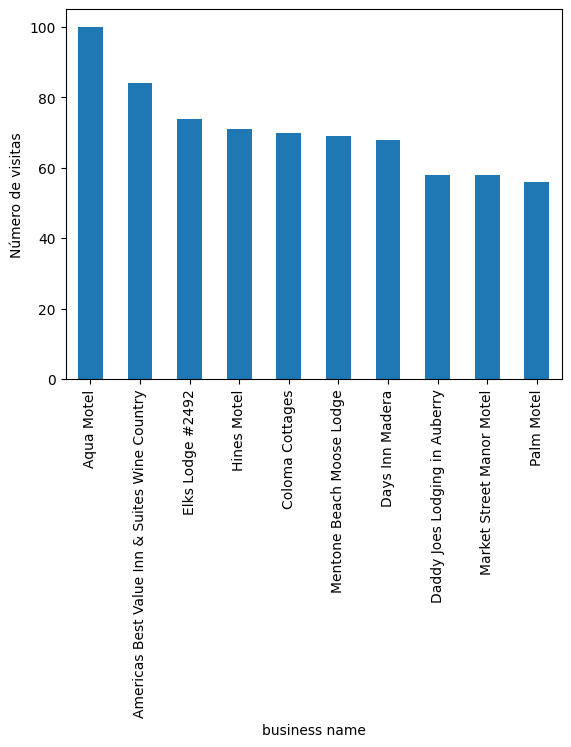

In [7]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

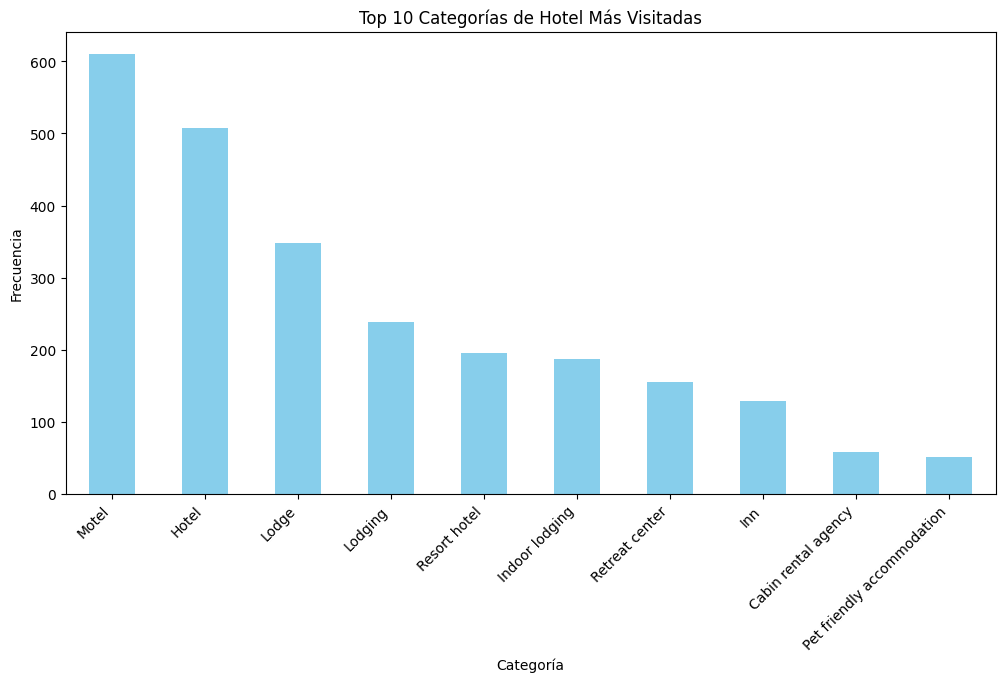

In [8]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = ca_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

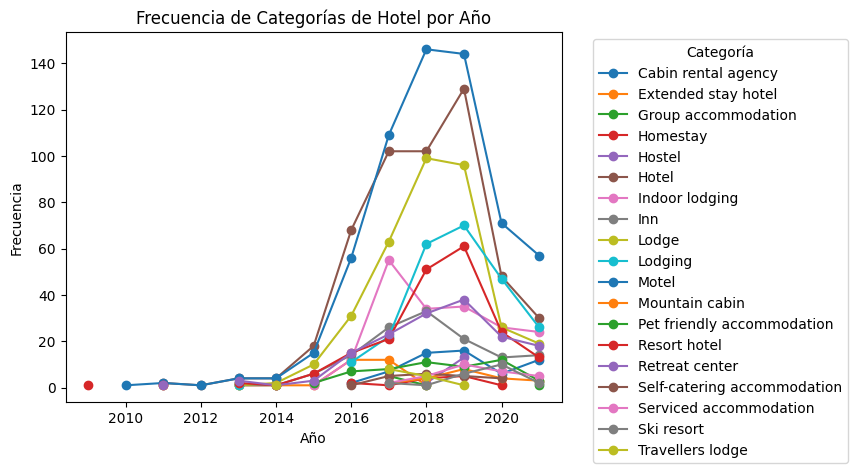

In [9]:

ca_hotels.loc[:, 'time'] = pd.to_datetime(ca_hotels['time'])

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = ca_hotels.groupby([ca_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

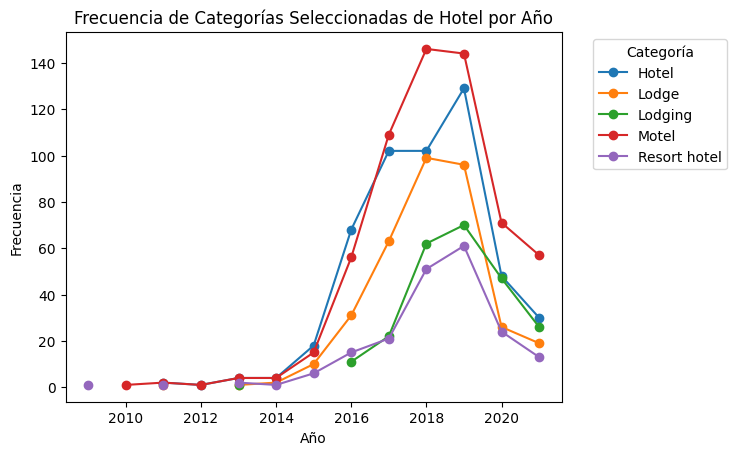

In [10]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = ca_hotels[ca_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.0 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

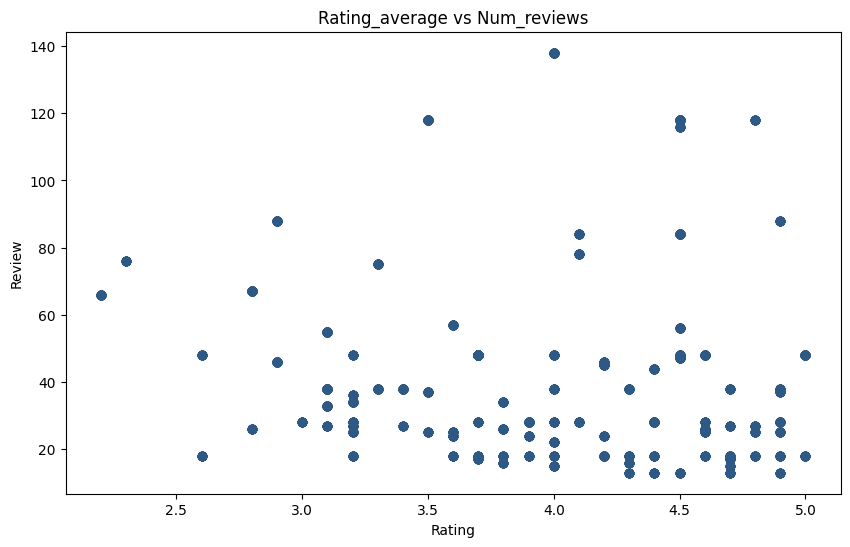

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(ca_hotels['avg_rating'], ca_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Numero de negocios (categoria) de la muestra de google maps en el estado de Nevada.

In [12]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = ca_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Motel                          610
Hotel                          508
Lodge                          348
Lodging                        239
Resort hotel                   196
Indoor lodging                 187
Retreat center                 156
Inn                            129
Cabin rental agency             59
Pet friendly accommodation      52
Serviced accommodation          29
Extended stay hotel             28
Mountain cabin                  21
Ski resort                      21
Self-catering accommodation     21
Hostel                          15
Travellers lodge                15
Homestay                        13
Group accommodation             11
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

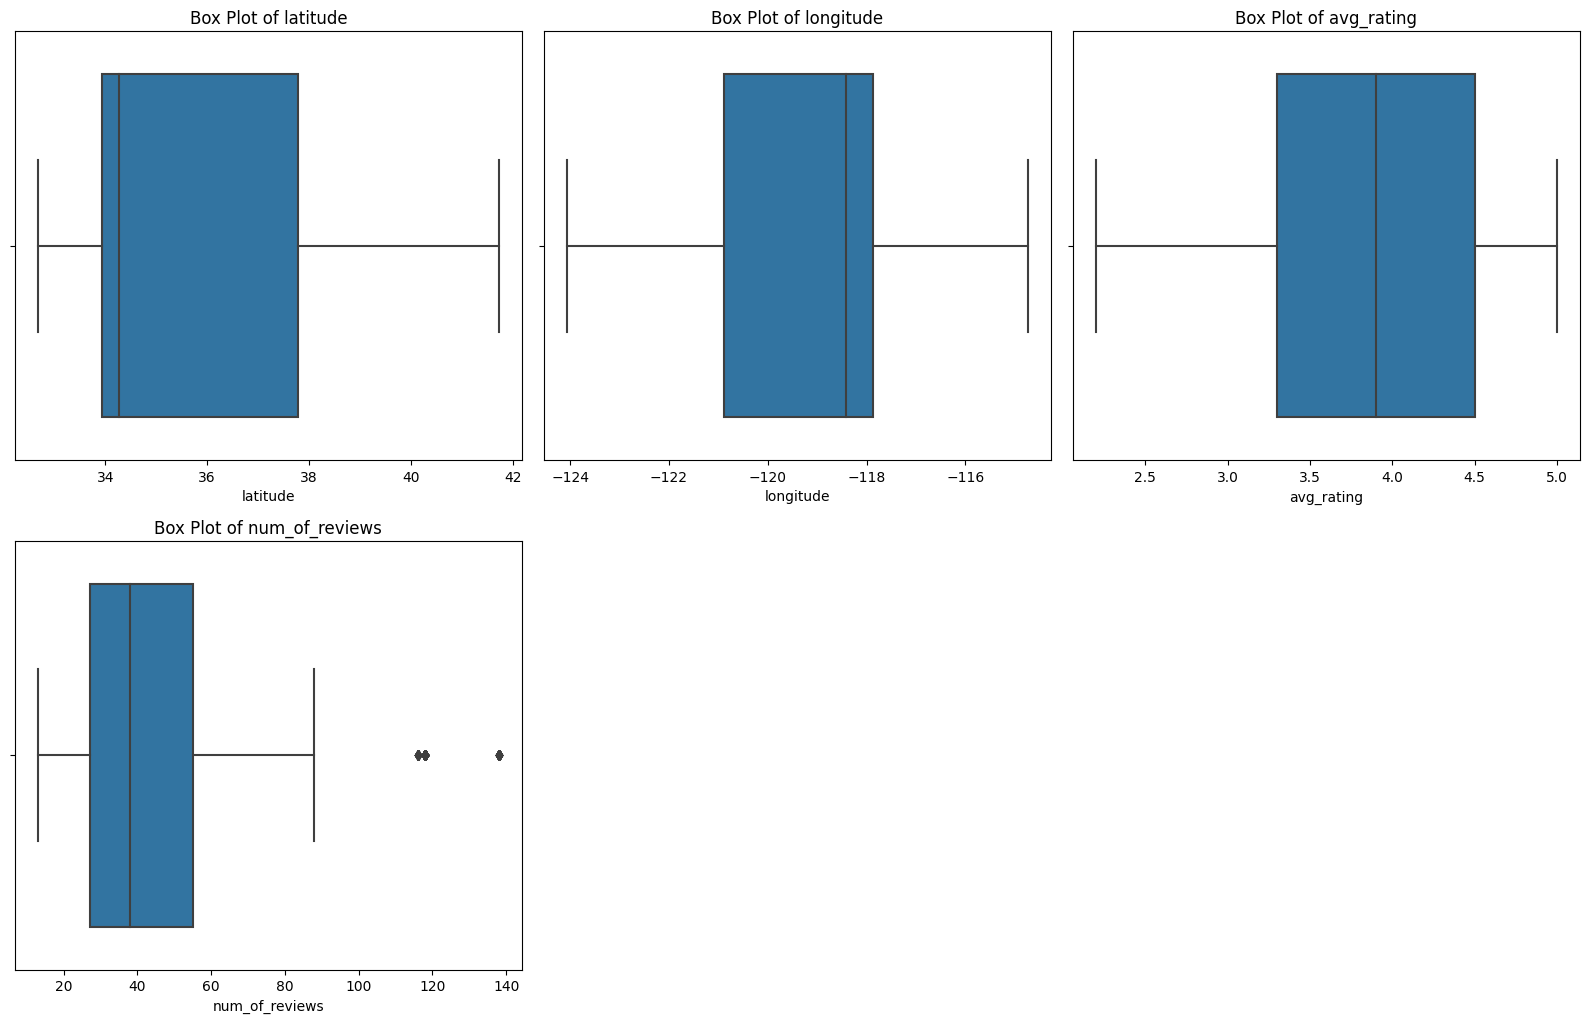

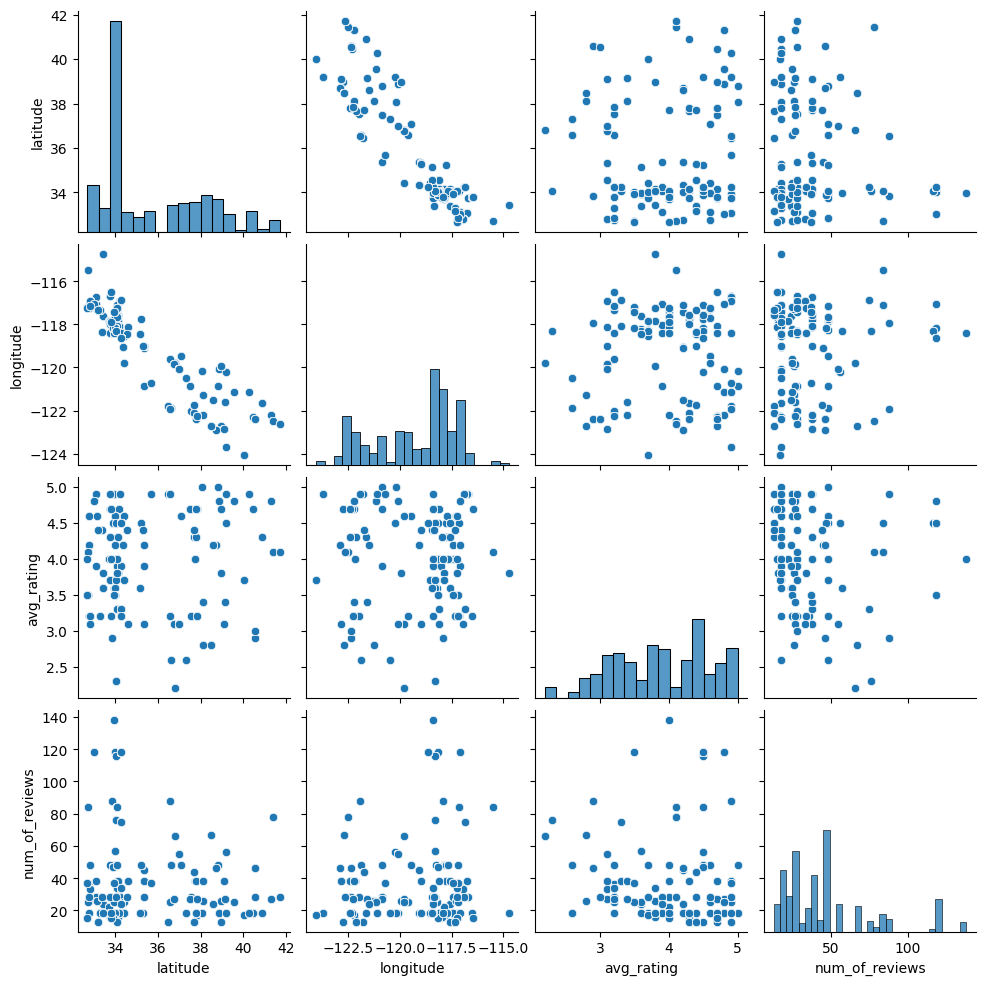

In [14]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=ca_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(ca_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

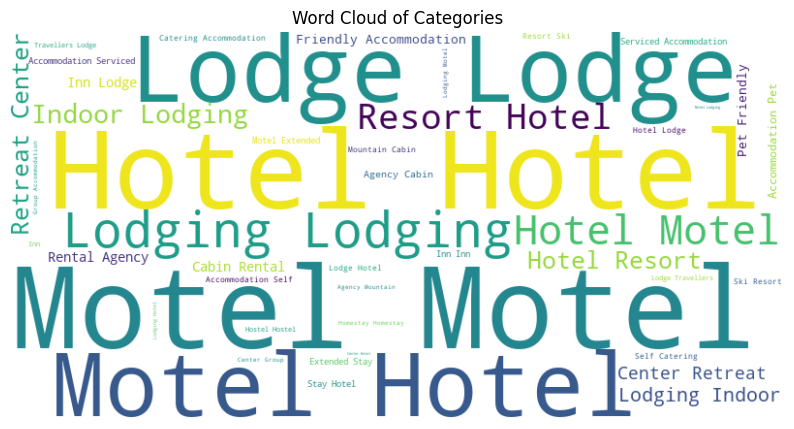

In [15]:
from wordcloud import WordCloud

ca_hotels.loc[:, 'category'] = ca_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(ca_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()